## What is Machine Learning?

Machine Learning is the art & science of programming computers to learn from data. 

> [Arthur Samuel] ML is the field of study that gives computers the ability to learn without being explicitly programmed.

A more formal definition:

> [Tom Mitchell] A computer program is said to learn from experience $E$ with respect to some task $T$ and some performance measure $P$, if its performance on $T$, as measured by $P$, improves with experience $E$.

## Why use Machine Learning?

When building non learners, we usually follow these steps:
1. We make rules
2. We write an algorithm
3. If the algorithm performs well, we deploy. If not, we go back to step `1`

However, if the problem is complex, we'll likely endup with a long list of rules that are hard to maintain and scale to other similar problems. An ML system would be much shorter, easier to maintain, and in many cases, more accurate.

We can simply train an algorithm on a large dataset, then inspect the algorithm's `feature importance` coefficient to gain a better understanding of the relation between the data & the problem. This is called data mining.

## Examples of Applications

ML has many applications, the following are a few notable ones:
- `Image Classification`: typically performed using convolutional neural networks.
- `Semantic segmentation`: the algorithm is trained to classify each pixel in an image, one example of this is brain tumor detection.
- `Natural Language Processing` (NLP): More specifically, text classification, which can be learned using RNNs, CNNs, or Transformers.
- Chatbots: Involve many NLP tasks such as Natural Language Understanding (NLU) and Question-Answering.
- Forecasting future revenue: a regression task that can be tackled using multiple algorithms such as:
    - Linear Regression
    - Polynomial Regression
    - SVM
    - Random Forest
    - Artificial Neural Networks
- `Speech recognition`: this problem can be tackled by recognizing the incoming audio signals using RNNs, CNNs or Transformers.
- Credit card fraud detection: detecting frauds can be solved using supervised (classification) or unsupervised (anomaly detection) learning.
- `Clustering`: segmenting clients based on their purchases so we can design targeted & more effective marketing campaigns.
- `Dimensionality reduction`: useful for high-dimensional data visualization and cluster analysis. It can be solved using algorithms such as `PCA` or `T-SNE`.
- `Recommender systems`: where we can feed in the sequence of client purchases (for example) to an artificial neural network to predict the next purchase.

## Types of Machine Learning Systems

Machine learning algorithms can be classified according to the amount of supervision they get during training, there are 4 major types of ML algorithms:

### Supervised Learning
With supervised learning, the training set we feed into the algorithm contains the targets/labels/desired predictions. Most supervised learning tasks fall under two umbrellas: Classification and Regression. With classification, we are interested in predicting discrete values (example: is the email spam `1` or not spam `1`). On the hand, regression deals with continuous target values (example: predict the price of houses in dollars). 

Some regression-based models are used for classification as well, such as `Logistic Regression` which outputs a probability $\in [0,1]$. Here are a few popular supervised learning algorithms
- K-nearest Neighbors
- Linear Regression
- Logistic Regression
- Decision Trees and Random Forests
- Artificial Neural Networks
- Naive Bayes

### Unsupervised Learning

In unsupervised learning, the data is unlabeled, the system is trying to learn without a teacher by finding internal structure within the dataset. Here are some unsupervised learning algorithms
- Clustering
    - K-means
    - DBSCAN
    - Hirerchical Cluster Analysis
- Anomaly Detection
    - one-class SVM
    - Isolation Forest
    - Auto-encoders
- Dimensionality Reduction: where the goal is to compress the data without losing too much information (one way to do it is to merge highly correlated features)
    - Principal Component Analysis: `PCA`
    - t-distributed stochastic Neighbor Embedding: `T-SNE`
    - Autoencoders
    - Kernel PCA
    - Local Linear Embedding (LLE)
- Association rule learning algorithms find interesting relations between attributes
    - Apriori
    - Eclat

### Semi-supervised Learning

In semi-supervised learning, we have partially-labeled data. The goal is to to use unlabeled data around the labeled data as helpers to solve the task. Most semi-supervised learning algorithms are a combination of unsupervised and supervised learning algorithms.

### Reinforcement Learning
An agent observes the environment, selects an action, gets a reward, and updates its policy.

We can also categorize ML systems to **batch** or **online** algorithms. The question is is whether the algorithm will learn from an incoming stream of data or not. 

### Batch vs. Online ML Algorithms

In batch learning, the model is incapable of incremental learning, it starts by learning from all of the available data offline, and then gets deployed to produce predictions without feeding it any new data points. Another name of batch learning is Offline Learning.

In online learning, we train the data incrementally by continuously feeding it data instances as they come, either individually or in small groups of instances called *mini-batches*. Each learning step is fast and cheap, so the system can learn as data comes, on the fly. Online learning is great for systems that receive data in a continuous flow. 

One important aspect of online learning is how fast the learning algorithm should adapt to new data points or to changes to the overall data distribution. With a big learning rate, the model tends to forget past data and lean heavily towards new data points. With a small learning rate, the model tends to slightly adapt to new data points but keeps its knowledge on old data points mostly intact.

A big challenge with online learning algorithms is that they can be damaged with bad incoming data points and clients will notice that on the fly To mitigate this, we can closely monitor the system through performance metrics and turn off online learning or revert back to a previous model state. We have to also make sure we clean the data before feeding it to the model by conducting anomaly/outlier detection.

### Instance-based versus Model-based Learning

One other way to categorize machine learning algorithms is how they generalize. There are two approaches to generalization: instance-based approaches and model-based approaches.

With instance-based Learning, we perform similarity-based comparisons, a new data point would be classified based on its similarity to the target group in the training set, this would require a measure of similarity.

In model-based learning we build a model for each class of data points and then use the model to classify a new data point (from the validation/test/production environment).

Let's go through an example of model-based learning using linear regression:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.linear_model

In [2]:
# get data & import it as a dataframe
gdp = pd.read_csv('gdp_per_capita.csv', sep='\t', encoding='latin1', thousands=',', na_values='n/a').dropna()
gdp.head()

,Country,Subject Descriptor,Units,Scale,Country/Series-specific Notes,2015,Estimates Start After
0,Afghanistan,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",599.994,2013.0
1,Albania,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",3995.383,2010.0
2,Algeria,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",4318.135,2014.0
3,Angola,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",4100.315,2014.0
4,Antigua and Barbuda,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",14414.302,2011.0


In [3]:
# get oecd data & import it as a dataframe
oecd = pd.read_csv('oecd.csv', thousands=',')[['Country', 'Indicator', 'Measure', 'Inequality', 'Unit', 'PowerCode', 'Value']]
oecd.head()

,Country,Indicator,Measure,Inequality,Unit,PowerCode,Value
0,Australia,Labour market insecurity,Value,Total,Percentage,Units,5.4
1,Austria,Labour market insecurity,Value,Total,Percentage,Units,3.5
2,Belgium,Labour market insecurity,Value,Total,Percentage,Units,3.7
3,Canada,Labour market insecurity,Value,Total,Percentage,Units,6.0
4,Czech Republic,Labour market insecurity,Value,Total,Percentage,Units,3.1


In [4]:
# Get countries + Life satisfaction
#: This part assigns the resulting DataFrame, which contains only the 'Country' and 'Value' columns for rows where 'Indicator' is 'Life satisfaction', back to the variable oecd.
oecd = oecd[['Country', 'Value']][oecd['Indicator'] == 'Life satisfaction']
oecd = oecd.rename(columns={'Value': 'Life satisfaction'})
oecd.head()

,Country,Life satisfaction
1812,Australia,7.3
1813,Austria,7.1
1814,Belgium,6.9
1815,Canada,7.4
1816,Czech Republic,6.7


In [5]:
# Get countries + GDP
gdp = gdp[['Country', '2015']]
gdp = gdp.rename(columns={'2015': 'GDP per capita (USD)'})
gdp = gdp[gdp['GDP per capita (USD)'] <= 60000]
gdp.head()

,Country,GDP per capita (USD)
0,Afghanistan,599.994
1,Albania,3995.383
2,Algeria,4318.135
3,Angola,4100.315
4,Antigua and Barbuda,14414.302


In [7]:
# Join GDP & Life satisfaction tables + Group by country as the unique column and average-aggregate GDP & Life satisfaction
country_stats = pd.merge(gdp, oecd, on='Country').groupby(['Country']).mean().reset_index()
country_stats.head()

,Country,GDP per capita (USD),Life satisfaction
0,Australia,50961.865,7.350
1,Austria,43724.031,7.225
2,Belgium,40106.632,7.000
3,Brazil,8669.998,6.400
4,Canada,43331.961,7.425


In [9]:
# get GDP for the x-axis and Life Satisfaction for the y-axis
X = country_stats['GDP per capita (USD)'].values.reshape(-1, 1)
y = country_stats['Life satisfaction'].values.reshape(-1, 1)
print(X)
print(y)


[[50961.865]
 [43724.031]
 [40106.632]
 [ 8669.998]
 [43331.961]
 [13340.905]
 [ 6083.51 ]
 [17256.918]
 [52114.165]
 [17288.083]
 [41973.988]
 [37675.006]
 [40996.511]
 [18064.288]
 [12239.894]
 [50854.583]
 [51350.744]
 [35343.336]
 [29866.581]
 [32485.545]
 [27195.197]
 [13618.569]
 [14210.28 ]
 [ 9009.28 ]
 [43603.115]
 [37044.891]
 [12495.334]
 [19121.592]
 [ 9054.914]
 [15991.736]
 [20732.482]
 [ 5694.572]
 [25864.721]
 [49866.266]
 [ 9437.372]
 [43770.688]
 [55805.204]]
[[7.35      ]
 [7.225     ]
 [7.        ]
 [6.4       ]
 [7.425     ]
 [6.48      ]
 [6.26666667]
 [6.7       ]
 [7.65      ]
 [5.78      ]
 [7.66      ]
 [6.54      ]
 [7.1       ]
 [5.34      ]
 [5.68      ]
 [7.58      ]
 [7.05      ]
 [7.225     ]
 [6.14      ]
 [5.9       ]
 [5.86666667]
 [5.94      ]
 [5.98      ]
 [6.46666667]
 [7.5       ]
 [7.3       ]
 [6.1       ]
 [5.48      ]
 [5.88      ]
 [6.425     ]
 [5.93333333]
 [4.7       ]
 [6.225     ]
 [7.4       ]
 [5.52      ]
 [6.86      ]
 [7.        ]]

In [11]:
print(X.shape,y.shape)

(37, 1) (37, 1)


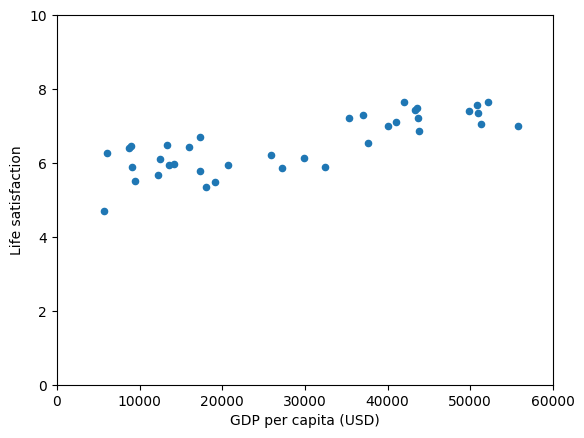

In [12]:
# Visualize Data
country_stats.plot(kind='scatter', x='GDP per capita (USD)', y='Life satisfaction', xlim=(0, 60000), ylim=(0,10))
plt.show()

In [13]:
# Select a Linear Model
model = sklearn.linear_model.LinearRegression()

In [14]:
# Train the Model
model.fit(X, y)

LinearRegression()

In [15]:
# Make a prediction for Cyprus
X_new = [[22587]]  # Cyprus GDP per capita
print(model.predict(X_new))

[[6.2910907]]


In [18]:
# let's visualize our model, because it's a linear one, we can plot it using two points
X = [[10000], [50000]]
y_hat = model.predict(X)
print(y_hat)


[[5.81746512]
 [7.32259131]]


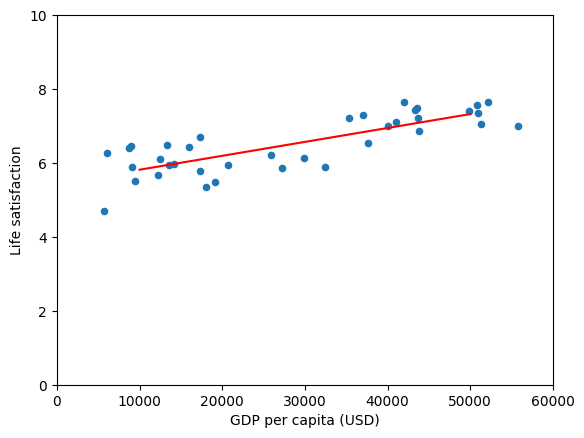

In [17]:
# Visualize Data
country_stats.plot(kind='scatter', x='GDP per capita (USD)', y='Life satisfaction', xlim=(0, 60000), ylim=(0,10))
plt.plot(X, y_hat, c='red')
plt.show()

In summary, we go through the following steps to deploy an ML algorithm:
1. We study the data: Exploratory data analysis (EDA)
2. We select the model
3. We train the model
4. We infer using the model

## Main Challenges of Machine Learning

The two things that can go wrong with a machine learning project are:
- Collecting bad data.
- Picking a bad learning algorithm

### Data

Data quantity can be a big problem. Even for very simple ml algorihtms, it takes thousands of examples for a convolutional neural network to recognize Cat/Dog in images. A famous paper showed that many algorithms, ranging from very simple ones to complex, perform relatively the same when given enough data. The authors argued that companies should reconsider where to invest their money, in algorithms development or in data corpus engineering.

The training sample can also be non-representative of the source dataset. In order to generalize well, It's important that our training data be representative of the data that we want to use in production. If, for example, the training set is too small, we will have sampling noise. Even large samples can be non-representative if the sampling method is flawed, this is called **sampling bias** (Example: non-response bias).

Poor quality data can also be a big challenge. Obviously, if our training data is full of outliers, errors, and noise, it will make it harder for the algorithm to detect the underlying patterns, resulting in a bad model. It's always better to properly clean and investigate the data before doing any modeling. Examples of data cleaning:
- Outlier detection and cleaning by either removing or replacing the outlier values.
- Cleaning missing features by either discarding their instances, filling them with median/average, or training an auxiliary model to predict their values. 

It's almost always the case that datasets contain irrelevant features. Our system will only learn if the data contains many relevant features and not so many irrelevant ones. A critical part of the success of a machine learning project is what's called **feature engineering** or coming up with features that would produce a quality model, it contains two steps:
1. Feature selection: selecting the most useful features to analyze.
2. Feature Extraction: adding new features based of the selected ones.
We can also create new features by gathering new data.

### Overfitting

A statistical model is said to be overfitted when the model does not make accurate predictions on testing data. When a model gets trained with so much data, it starts learning from the noise and inaccurate data entries in our data set. 

Constraining a model & fighting overfitting is called **regularization**. If we take the example of a single linear regression model ($f(x)=ax+b$), it has two degrees of freedom ($2$ parameters). If we let the algorithm change one parameter's values freely but have a set interval around parameter 2, it will have between 1 and 2 degree of freedom. We would want a good balance between keeping the model as simple as possible while giving the model the ability to capture out of training data patterns.

Regularization can be controlled using the model's hyperparameters, which describe how the model should learn.

### Underfitting

Underfitting is the opposite of overfitting. It occurs when the model is too simple to capture the underlying structure of the training data. We present the following solutions to the problem:
- We can select a more powerful model, with more parameters
- We feed better features to the learning algorithm (feature engineering)
- We reduce the constraints on the model (reduce regularization)